### Ackermann function

In [2]:
import sys, math
from functools import lru_cache
import numpy as np
import matplotlib.pyplot as plt

sys.setrecursionlimit(10000)

In [ ]:
@lru_cache(maxsize=None)
def ackermann(m: int, n: int) -> int:
    """Ackermann function, implemented recursively with memoization."""
    if m == 0:
        return n + 1
    if n == 0:
        return ackermann(m - 1, 1)
    return ackermann(m - 1, ackermann(m, n - 1))


In [ ]:
m_max, n_max = 4, 6

A = np.empty((m_max + 1, n_max + 1), dtype=object) 
for m in range(m_max + 1):
    for n in range(n_max + 1):
        try:
            A[m, n] = ackermann(m, n)
        except RecursionError:
            A[m, n] = None             # recursion depth blown for very large m, n
A


array([[1, 2, 3, 4, 5, 6, 7],
       [2, 3, 4, 5, 6, 7, 8],
       [3, 5, 7, 9, 11, 13, 15],
       [5, 13, 29, 61, 125, 253, 509],
       [13, None, None, None, None, None, None]], dtype=object)

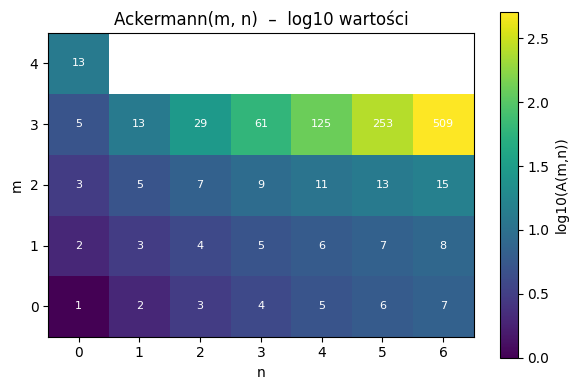

In [ ]:
A_log = np.full_like(A, np.nan, dtype=float)
for m in range(m_max + 1):
    for n in range(n_max + 1):
        if A[m, n] is not None:
            A_log[m, n] = math.log10(A[m, n])   # log-scale for readability

fig, ax = plt.subplots(figsize=(6, 4))
im = ax.imshow(A_log, cmap="viridis", origin="lower")

# Axis labels
ax.set_xticks(range(n_max + 1))
ax.set_yticks(range(m_max + 1))
ax.set_xlabel("n")
ax.set_ylabel("m")
ax.set_title("Ackermann(m, n) – log10 values")

# Optional: print exact (small) values on the heat-map tiles
for (m, n), val in np.ndenumerate(A):
    if val is not None and val < 1e9:   # skip gigantic values
        ax.text(n, m, str(val), ha="center", va="center", fontsize=8, color="white")

fig.colorbar(im, ax=ax, label="log10(A(m, n))")
plt.tight_layout()
plt.show()